In [78]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import load_model
from keras.metrics import categorical_accuracy
from keras.losses import categorical_crossentropy
from keras.utils import to_categorical
import os
import pickle
from sklearn.metrics import confusion_matrix

In [79]:
def cat2Int(y):
    y = y.argmax(axis=1)
    return y


In [80]:
xTrnPath = r"D:\Projects\OCT-Image-Classification\PreprocessedData\preprocessedForCNN\imgData_train_1000.npy"
xValPath = r"D:\Projects\OCT-Image-Classification\PreprocessedData\preprocessedForCNN\imgData_val.npy"
xTestPath = r"D:\Projects\OCT-Image-Classification\PreprocessedData\preprocessedForCNN\imgData_test.npy"
yTrnPath = r"D:\Projects\OCT-Image-Classification\PreprocessedData\preprocessedForCNN\targetData_train.npy"
yValPath = r"D:\Projects\OCT-Image-Classification\PreprocessedData\preprocessedForCNN\targetData_val.npy"
yTestPath = r"D:\Projects\OCT-Image-Classification\PreprocessedData\preprocessedForCNN\targetData_test.npy"

xTrn = np.load(xTrnPath)
xVal = np.load(xValPath)
xTest = np.load(xTestPath)

yTrn = np.load(yTrnPath)
yVal = np.load(yValPath)
yTest = np.load(yTestPath)

#yTrn = to_categorical(yTrn_)
#yVal = to_categorical(yVal_)
#yTest = to_categorical(yTest_)


In [44]:
inceptionHistPath = "D:\Projects\OCT-Image-Classification\modelOutput\InceptionV3_2019-04-24\modelHistory.pickle"
bestInceptionPath = r"D:\Projects\OCT-Image-Classification\modelOutput\InceptionV3_2019-04-24\modelName.hdf5"

vgg16HistPath = r"D:\Projects\OCT-Image-Classification\modelOutput\VGG16_2019-04-25\modelHistory.pickle"
bestVGGPath = r"D:\Projects\OCT-Image-Classification\modelOutput\VGG16_2019-04-25\modelName.hdf5"


In [45]:
with open(inceptionHistPath, 'rb') as fid:
    inceptionHist = pickle.load(fid)
    
with open(vgg16HistPath, 'rb') as fid:
    vgg16Hist = pickle.load(fid)
    
inceptionV3 = load_model(inceptionHistPath)
vgg16 = load_model(bestVGGPath)

In [46]:
?load_model

In [41]:
hist = vgg16Hist.history
trnLoss = np.array(hist['loss'])
valLoss = np.array(hist['val_loss'])
trnAcc = np.array(hist['acc'])
valAcc = np.array(hist['val_acc'])
trnEntp = np.array(hist['categorical_crossentropy'])
valEntp = np.array(hist['val_categorical_crossentropy'])

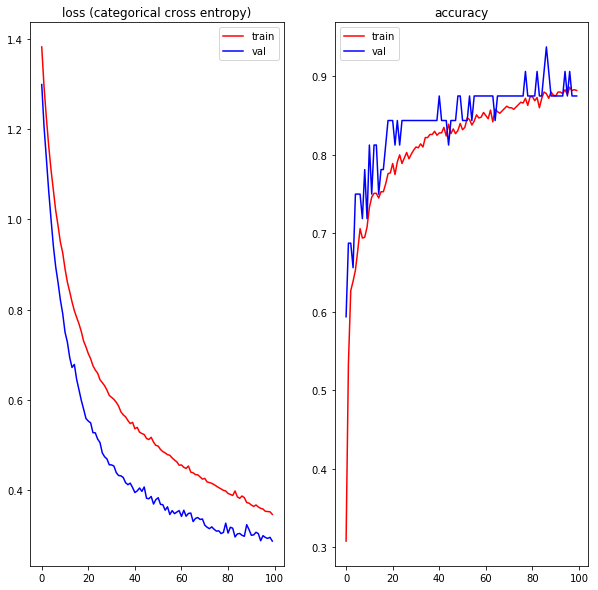

In [38]:
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(trnLoss, c='r', label='train')
plt.plot(valLoss, c='b', label='val')
plt.title('loss (categorical cross entropy)')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(trnAcc, c='r', label='train')
plt.plot(valAcc, c='b', label='val')
plt.title('accuracy')
plt.legend()
plt.show()


In [51]:
yTrnPred = vgg16.predict(xTrn, batch_size=20, verbose=1)
yValPred = vgg16.predict(xVal, batch_size=20, verbose=1)
yTestPred = vgg16.predict(xTest, batch_size=20, verbose=1)


968/968 [==============================] - 237s 244ms/step


In [84]:
print('accuracy')
print('\t trn: {}'.format(accuracy_score(yTrn, cat2Int(yTrnPred))))
print('\t val: {}'.format(accuracy_score(yVal, cat2Int(yValPred))))
print('\t test: {}'.format(accuracy_score(yTest, cat2Int(yTestPred))))




accuracy
	 trn: 0.894
	 val: 0.875
	 test: 0.9173553719008265


In [ ]:
n = 4
plt.figure(figsize=(10, 10))
for i in range(1, 2*n+1):
    plt.subplot(1, 2, i)
    
    plt.subplot(1, 2, n+i)
    